# Credit card default prediction

### About dataset
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. There are 25 features in the dataset:
1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
25. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

### Data loading

In [3]:
# Import libraries
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/data/UCI_Credit_Card.csv')

### Basic exploration

In [5]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.shape

(30000, 25)

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
# Check the data-types and missing values of all the columns
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
# Check unique values in a column
print('SEX' + str(sorted(df['SEX'].unique())))
print('EDUCATION' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE' + str(sorted(df['MARRIAGE'].unique())))
print('PAY_0' + str(sorted(df['PAY_0'].unique())))
print('default.payment.next.month' + str(sorted(df['default.payment.next.month'].unique())))

SEX[1, 2]
EDUCATION[0, 1, 2, 3, 4, 5, 6]
MARRIAGE[0, 1, 2, 3]
PAY_0[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
default.payment.next.month[0, 1]


### Data cleaning

In [11]:
# Some categories are undocumented

# The 0, 5 and 6 in EDUCATION can be categorized as 'Other' (4)
fill = (df['EDUCATION']==0) | (df['EDUCATION']==5) | (df['EDUCATION']==6)
df.loc[fill, 'EDUCATION']=4

# The 0 in MARRIAGE can be categorized as 'Other' (3)
df.loc[df['MARRIAGE']==0, 'MARRIAGE']=3

# The -2, -1 and 0 in PAY_n can be categorized as 'Pay duly' (0)
fill = (df['PAY_0']==-2) | (df['PAY_0']==-1) | (df['PAY_0']==0)
df.loc[fill, 'PAY_0']=0

fill = (df['PAY_2']==-2) | (df['PAY_2']==-1) | (df['PAY_2']==0)
df.loc[fill, 'PAY_2']=0

fill = (df['PAY_3']==-2) | (df['PAY_3']==-1) | (df['PAY_3']==0)
df.loc[fill, 'PAY_3']=0

fill = (df['PAY_4']==-2) | (df['PAY_4']==-1) | (df['PAY_4']==0)
df.loc[fill, 'PAY_4']=0

fill = (df['PAY_5']==-2) | (df['PAY_5']==-1) | (df['PAY_5']==0)
df.loc[fill, 'PAY_5']=0

fill = (df['PAY_6']==-2) | (df['PAY_6']==-1) | (df['PAY_6']==0)
df.loc[fill, 'PAY_6']=0

In [12]:
# Remove ID variable
df = df.drop(columns=['ID'])

### Exploratory data analysis

##### Default distribution

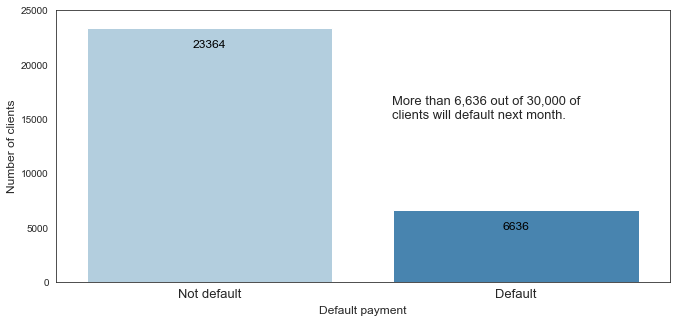

In [13]:
plt.figure(figsize=(11,5))
sns.set_style('white')
ax = sns.countplot(data=df, x='default.payment.next.month', palette='Blues')

ax.set_xlabel('Default payment', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

plt.ylim(0,25000)
plt.annotate('More than 6,636 out of 30,000 of \nclients will default next month.', xy=(0.595, 15000), fontsize=13)
plt.xticks([0,1],['Not default', 'Default'], fontsize=13); plt.ylabel('Number of clients', fontsize=12)
plt.show()

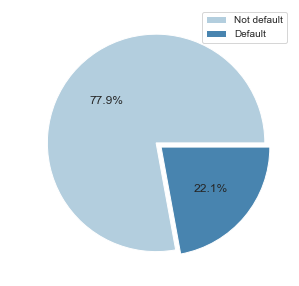

In [14]:
plt.figure(figsize=(5,5))

df['default.payment.next.month'].value_counts().plot(kind='pie', labels=['',''], 
                                        autopct='%1.1f%%', colors=['#B3CEDE','#4884AF'], 
                                        explode=[0,0.06], textprops={"fontsize":12})

plt.ylabel(' ')
plt.legend(labels=['Not default','Default'])
plt.show()

##### Default by Sex

In [15]:
df['default.payment.next.month'].groupby(df['SEX']).value_counts(normalize=True) 

SEX  default.payment.next.month
1    0                             0.758328
     1                             0.241672
2    0                             0.792237
     1                             0.207763
Name: default.payment.next.month, dtype: float64

In [16]:
colors = ['#B3CEDE', '#4884AF']
clientes = ['Not default', 'Default']
counter = df['default.payment.next.month'].groupby(df['SEX']).value_counts().unstack()
p_dist = 100 * counter.divide(counter.sum(axis = 1), axis=0)

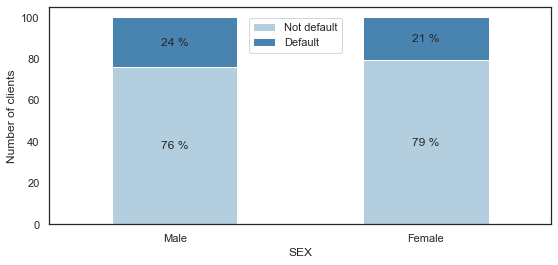

In [17]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_style("white")

ax = p_dist.plot.bar(stacked=True, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')

plt.legend(clientes, loc=(0.398, 0.79), fontsize = 11)   
plt.xticks([0,1],['Male','Female'], rotation='horizontal'); plt.ylabel('Number of clients', fontsize = 12)
plt.show()

##### Default by Age

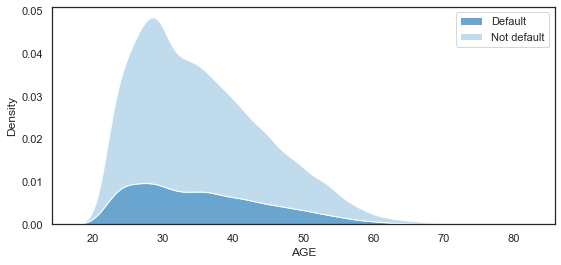

In [18]:
plt.figure(figsize=(9,4))
sns.kdeplot(data=df, x='AGE', hue='default.payment.next.month', multiple='stack', palette='Blues')

plt.legend(loc='upper right', labels=['Default', 'Not default'])
plt.ylabel('Density', fontsize= 12)
plt.show()

##### Default by Education level

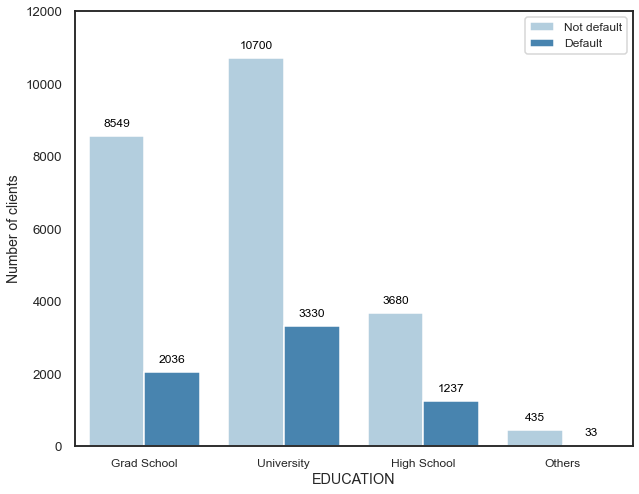

In [19]:
plt.figure(figsize=(10,8))
sns.set_context('talk', font_scale=0.8)

ax = sns.countplot(data=df, x='EDUCATION', hue='default.payment.next.month', palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+800), ha='center', va='top', color='black', size=12)

plt.ylim(0,12000)
plt.xticks([0,1,2,3], ['Grad School', 'University', 'High School', 'Others'], fontsize=12);plt.ylabel('Number of clients', fontsize = 14)
plt.legend(labels=['Not default', 'Default'], fontsize=12)
plt.show()

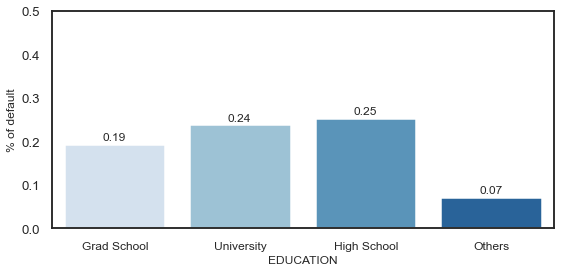

In [20]:
plt.figure(figsize=(9,4))
sns.set_style('white')

ax = sns.barplot(x='EDUCATION', y='default.payment.next.month', data=df, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate('%.2f' %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.ylabel('% of default', fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Grad School', 'University', 'High School', 'Others'], fontsize = 12); plt.xlabel('EDUCATION', fontsize = 12)
plt.show()

##### Default by Marital status

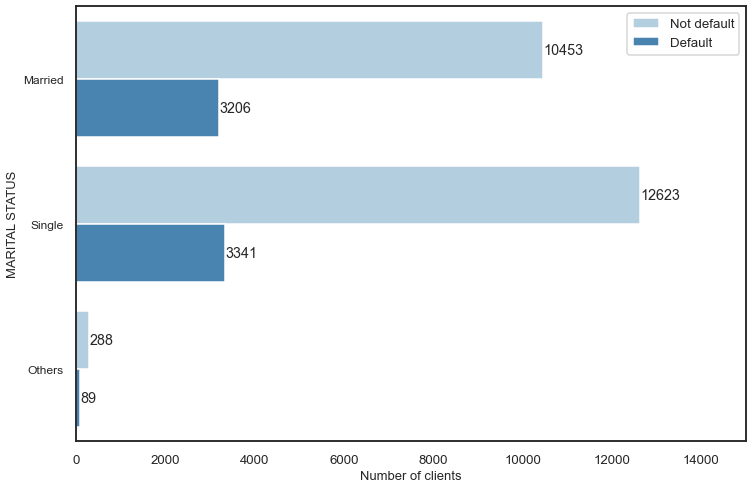

In [21]:
plt.figure(figsize=(12,8))
sns.set_style('white')

ax = sns.countplot(data=df, y='MARRIAGE', hue='default.payment.next.month', palette='Blues')

for p in ax.patches:
  height = p.get_height()
  width = p.get_width()
  ax.text(x=width+3,
  y = p.get_y()+(height/2),
  s = '{:.0f}'.format(width),
  va = 'center')

plt.xlim(0,15000)
plt.ylabel('MARITAL STATUS', fontsize=13)
plt.yticks([0,1,2],['Married','Single','Others'], fontsize=12);plt.xlabel('Number of clients', fontsize=13)
plt.legend(labels=['Not default', 'Default'])
plt.show()

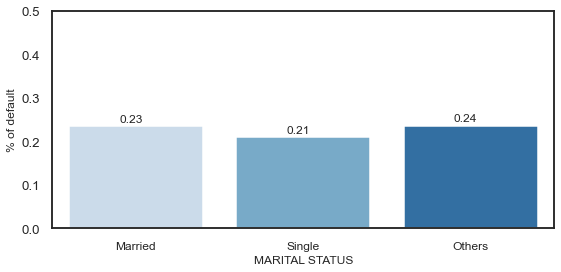

In [22]:
plt.figure(figsize=(9,4))
sns.set_style('white')

ax = sns.barplot(x='MARRIAGE', y='default.payment.next.month', data=df, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.ylabel('% of default', fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2], ['Married','Single','Others'], fontsize = 12); plt.xlabel('MARITAL STATUS', fontsize=12)
plt.show()

### Correlation

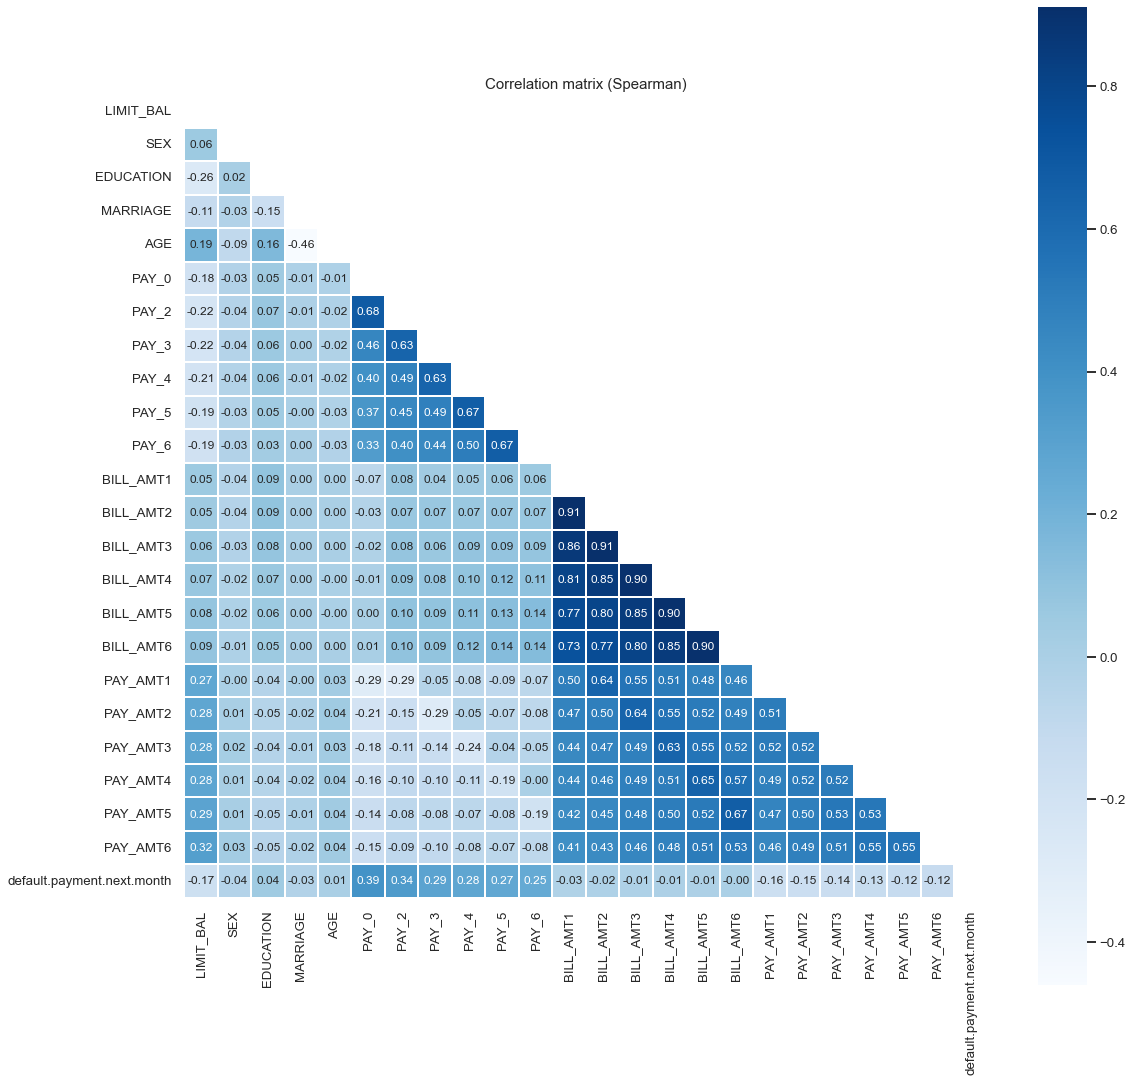

In [23]:
# Visualisation of the correlation matrix
corr = df.corr(method='spearman') 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

with sns.axes_style("white"):
    plt.subplots(figsize=(18, 18))
    sns.heatmap(corr, mask=mask, square=True, linewidths=.3, fmt='.2f', cmap="Blues", annot=True, annot_kws={"size": 12})
plt.title('Correlation matrix (Spearman)', size=15)
plt.show()

In [24]:
df.corr(method='spearman').abs()['default.payment.next.month'].sort_values(ascending=False)

default.payment.next.month    1.000000
PAY_0                         0.391160
PAY_2                         0.338456
PAY_3                         0.294262
PAY_4                         0.276443
PAY_5                         0.267795
PAY_6                         0.247234
LIMIT_BAL                     0.169586
PAY_AMT1                      0.160493
PAY_AMT2                      0.150977
PAY_AMT3                      0.139388
PAY_AMT4                      0.127979
PAY_AMT6                      0.121444
PAY_AMT5                      0.116587
EDUCATION                     0.043425
SEX                           0.039961
MARRIAGE                      0.028698
BILL_AMT1                     0.025327
BILL_AMT2                     0.015554
BILL_AMT3                     0.012670
BILL_AMT4                     0.008357
BILL_AMT5                     0.006851
AGE                           0.005149
BILL_AMT6                     0.000076
Name: default.payment.next.month, dtype: float64

### Standardization of data

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for column in df.columns:
    df[column] = scaler.fit_transform(np.array(df[column]).reshape(-1,1))

In [26]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.159075,0.603733,0.280756,0.278633,0.249750,0.044596,0.040004,0.038008,0.032346,0.027688,...,0.200891,0.120620,0.290851,0.006483,0.003516,0.005832,0.007771,0.011252,0.009865,0.221200
std,0.131058,0.489129,0.248165,0.260702,0.158929,0.095074,0.100216,0.098824,0.095139,0.089715,...,0.060601,0.060284,0.045766,0.018961,0.013680,0.019650,0.025227,0.035820,0.033627,0.415062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.000000,0.000000,0.000000,0.120690,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.162330,0.082396,0.261944,0.001145,0.000495,0.000435,0.000477,0.000592,0.000223,0.000000
50%,0.131313,1.000000,0.333333,0.500000,0.224138,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.178084,0.098600,0.274097,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837,0.000000
75%,0.232323,1.000000,0.333333,0.500000,0.344828,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211482,0.130415,0.298787,0.005731,0.002969,0.005028,0.006463,0.009452,0.007566,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Spliting the data into train and test

In [27]:
Y = df['default.payment.next.month']  # select target 
X = df[df.columns.difference(['default.payment.next.month'])]  # select features

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123) # splitting the data for sklearn methods

### Machine Learning Models

##### DecisionTree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=123)
dtc.fit(X_train, y_train)
pred_1=dtc.predict(X_test)

from sklearn import metrics
accur_1 = metrics.accuracy_score(y_test, pred_1)
prec_1 = metrics.precision_score(y_test, pred_1)
recc_1 = metrics.recall_score(y_test, pred_1)
f_1 = metrics.f1_score(y_test, pred_1)

list_models = []
list_accur = []
list_prec = []
list_recc = []
list_f1 = []

list_models.append('DecisionTree')
list_accur.append(accur_1)
list_prec.append(prec_1)
list_recc.append(recc_1)
list_f1.append(f_1)

In [30]:
accur_1, prec_1, f_1

(0.723, 0.37621023513139695, 0.3956363636363636)

##### RandomForest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=123)
rfc.fit(X_train, y_train)
pred_2 = rfc.predict(X_test)

accur_2 = metrics.accuracy_score(y_test, pred_2)
prec_2 = metrics.precision_score(y_test, pred_2)
recc_2 = metrics.recall_score(y_test, pred_2)
f_2 = metrics.f1_score(y_test, pred_2)
list_models.append('RandomForest')
list_accur.append(accur_2)
list_prec.append(prec_2)
list_recc.append(recc_2)
list_f1.append(f_2)

In [32]:
accur_2, prec_2, f_2

(0.8151666666666667, 0.6223337515683814, 0.4721561161351737)

##### AdaBoost Classifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=123)
adb.fit(X_train, y_train)
pred_3 = adb.predict(X_test)  

accur_3 = metrics.accuracy_score(y_test, pred_3)
prec_3 = metrics.precision_score(y_test, pred_3)
recc_3 = metrics.recall_score(y_test, pred_3)
f_3 = metrics.f1_score(y_test, pred_3)
list_models.append('AdaBoost')
list_accur.append(accur_3)
list_prec.append(prec_3)
list_recc.append(recc_3)
list_f1.append(f_3)

In [34]:
accur_1, prec_1, f_1

(0.723, 0.37621023513139695, 0.3956363636363636)

##### GaussianNB

In [35]:
from sklearn.naive_bayes import GaussianNB
gau = GaussianNB()
gau.fit(X_train, y_train)
pred_4 = gau.predict(X_test)

accur_4 = metrics.accuracy_score(y_test, pred_4)
prec_4 = metrics.precision_score(y_test, pred_4)
recc_4 = metrics.recall_score(y_test, pred_4)
f_4 = metrics.f1_score(y_test, pred_4)
list_models.append('GaussianNB')
list_accur.append(accur_4)
list_prec.append(prec_4)
list_recc.append(recc_3)
list_f1.append(f_4)

In [36]:
accur_4, prec_4, f_4

(0.7595, 0.4569659442724458, 0.5056526207605344)

### Performance Metrics

##### Accuracy

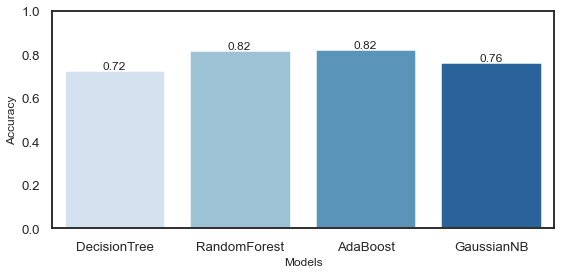

In [37]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x=list_models, y=list_accur, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.xlabel('Models', fontsize= 12)
plt.ylim(0, 1.0)
plt.ylabel('Accuracy', fontsize= 12)
plt.show()

##### Precision

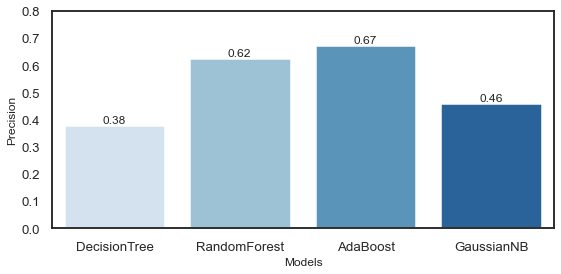

In [38]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x=list_models, y=list_prec, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.xlabel('Models', fontsize= 12)
plt.ylim(0, 0.8)
plt.ylabel('Precision', fontsize= 12)
plt.show()

##### Recall

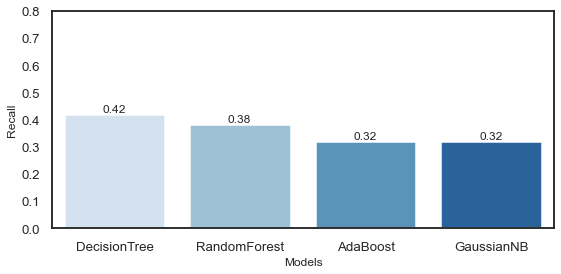

In [39]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x=list_models, y=list_recc, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.xlabel('Models', fontsize= 12)
plt.ylim(0, 0.8)
plt.ylabel('Recall', fontsize= 12)
plt.show()

##### F-1 score

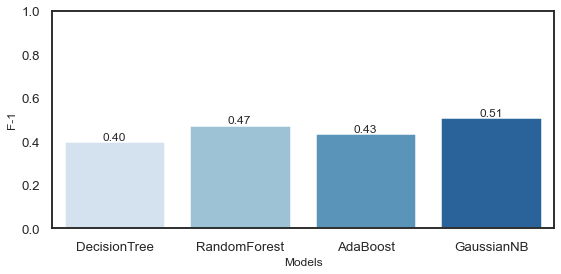

In [40]:
plt.figure(figsize=(9,4))
sns.set_style("white")

ax = sns.barplot(x=list_models, y=list_f1, palette='Blues', ci=None)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01), size=12)

plt.xlabel('Models', fontsize= 12)
plt.ylim(0, 1.0)
plt.ylabel('F-1', fontsize= 12)
plt.show()

##### Confusion matrix

[Text(0, 0.5, 'Not default (0)'), Text(0, 1.5, 'Default (1)')]

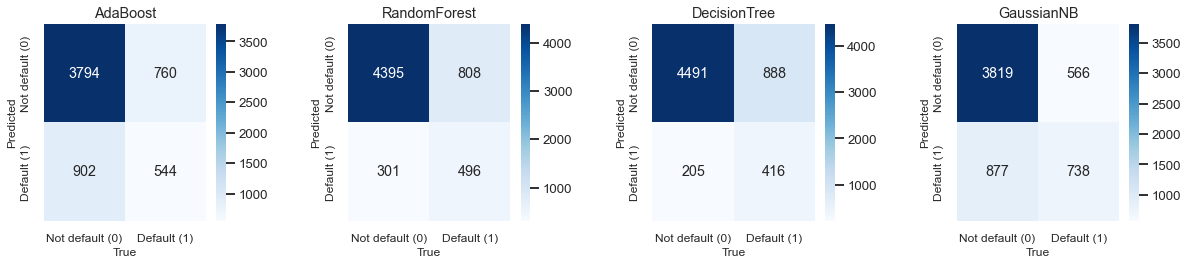

In [41]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(20, 8))
plt.subplots_adjust(wspace=0.5)

ax1 = fig.add_subplot(241)
confMatrix = confusion_matrix(pred_1, y_test)
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('True', fontsize = 12)
plt.ylabel('Predicted', fontsize = 12)
plt.title('AdaBoost')
ax1.xaxis.set_ticklabels(['Not default (0)', 'Default (1)'], fontsize = 12) 
ax1.yaxis.set_ticklabels(['Not default (0)', 'Default (1)'], fontsize = 12)

ax2 = fig.add_subplot(242)
confMatrix = confusion_matrix(pred_2, y_test)
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('True', fontsize = 12)
plt.ylabel('Predicted', fontsize = 12)
plt.title('RandomForest')
ax2.xaxis.set_ticklabels(['Not default (0)', 'Default (1)'], fontsize = 12) 
ax2.yaxis.set_ticklabels(['Not default (0)', 'Default (1)'], fontsize = 12)

ax3 = fig.add_subplot(243)
confMatrix = confusion_matrix(pred_3, y_test)
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('True', fontsize = 12)
plt.ylabel('Predicted', fontsize = 12)
plt.title('DecisionTree')
ax3.xaxis.set_ticklabels(['Not default (0)', 'Default (1)'], fontsize = 12) 
ax3.yaxis.set_ticklabels(['Not default (0)', 'Default (1)'], fontsize = 12)

ax4 = fig.add_subplot(244)
confMatrix = confusion_matrix(pred_4, y_test)
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('True', fontsize = 12)
plt.ylabel('Predicted', fontsize = 12)
plt.title('GaussianNB')
ax4.xaxis.set_ticklabels(['Not default (0)', 'Default (1)'], fontsize = 12) 
ax4.yaxis.set_ticklabels(['Not default (0)', 'Default (1)'], fontsize = 12)